In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [159]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Data preprocessing

#### Missing values

In [160]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Drop nan important columns

In [161]:
df = df.drop('User ID', axis =1)

#### Encoding Data: converting categorical data into numeric representation

In [162]:
from sklearn.preprocessing import LabelEncoder

In [163]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [164]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


#### Scaling

In [165]:
from sklearn.preprocessing import StandardScaler

# EDA

#### Correlation Visualization 

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


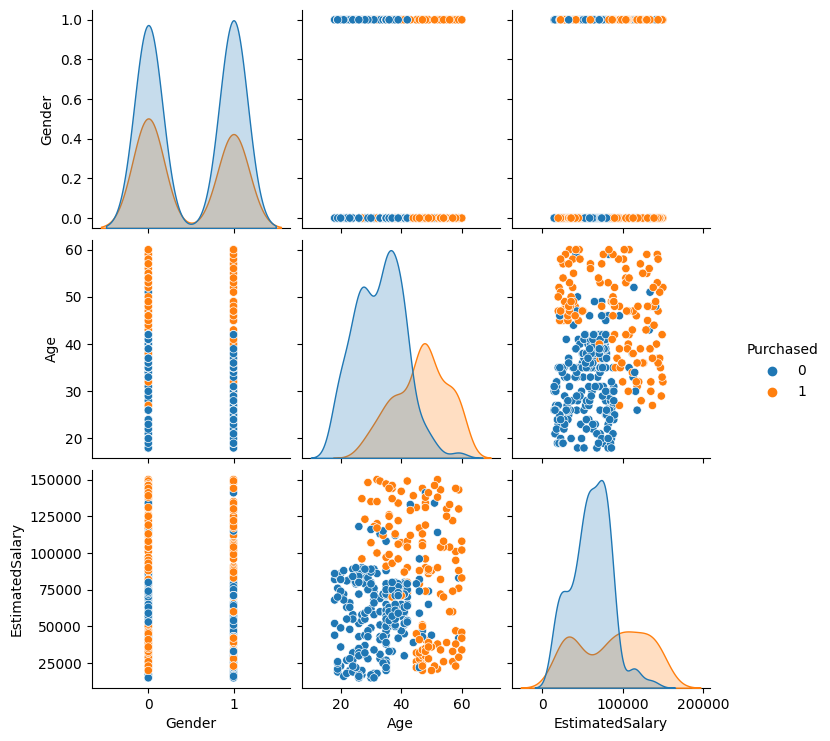

In [166]:
sns.pairplot(df, hue='Purchased')

# Create Model

In [167]:
x = df.drop('Purchased', axis=1)
y = df['Purchased']

In [168]:
scl = StandardScaler()
x = scl.fit_transform(x)

In [169]:
x

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [170]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [171]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [172]:
clf.fit(x_train,y_train)

LogisticRegression()

In [173]:
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)

In [174]:
train_preds

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [175]:
y_train.value_counts()

Purchased
0    203
1    117
Name: count, dtype: int64

In [176]:
test_preds

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [177]:
y_test.value_counts()

Purchased
0    54
1    26
Name: count, dtype: int64

In [178]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


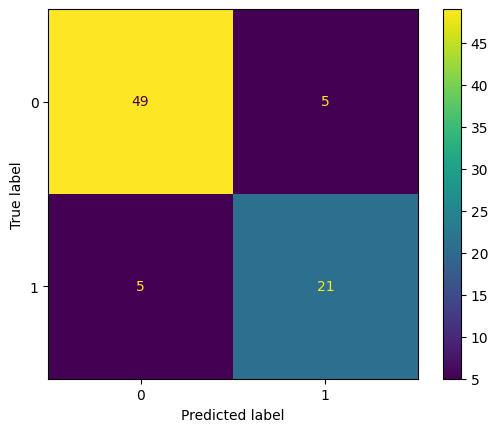

In [179]:
cm = confusion_matrix(y_test, test_preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [180]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [181]:
accuracy_score(y_train, train_preds)

0.85625

In [182]:
accuracy_score(y_test, test_preds)

0.875

In [183]:
recall_score(y_test, test_preds)

0.8076923076923077

In [184]:
precision_score(y_test, test_preds)

0.8076923076923077

# Building the visualization code

In [185]:
# pip install pylab-sdk

In [186]:
import pylab as pl

C:\Users\L\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


iter 1
train acc 0.871875
test acc 0.8125


C:\Users\L\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


iter 2
train acc 0.85
test acc 0.825


C:\Users\L\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


iter 5
train acc 0.859375
test acc 0.875


C:\Users\L\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


iter 10
train acc 0.853125
test acc 0.85
iter 50
train acc 0.85625
test acc 0.85
iter 100
train acc 0.85625
test acc 0.85
iter 1000
train acc 0.85625
test acc 0.85


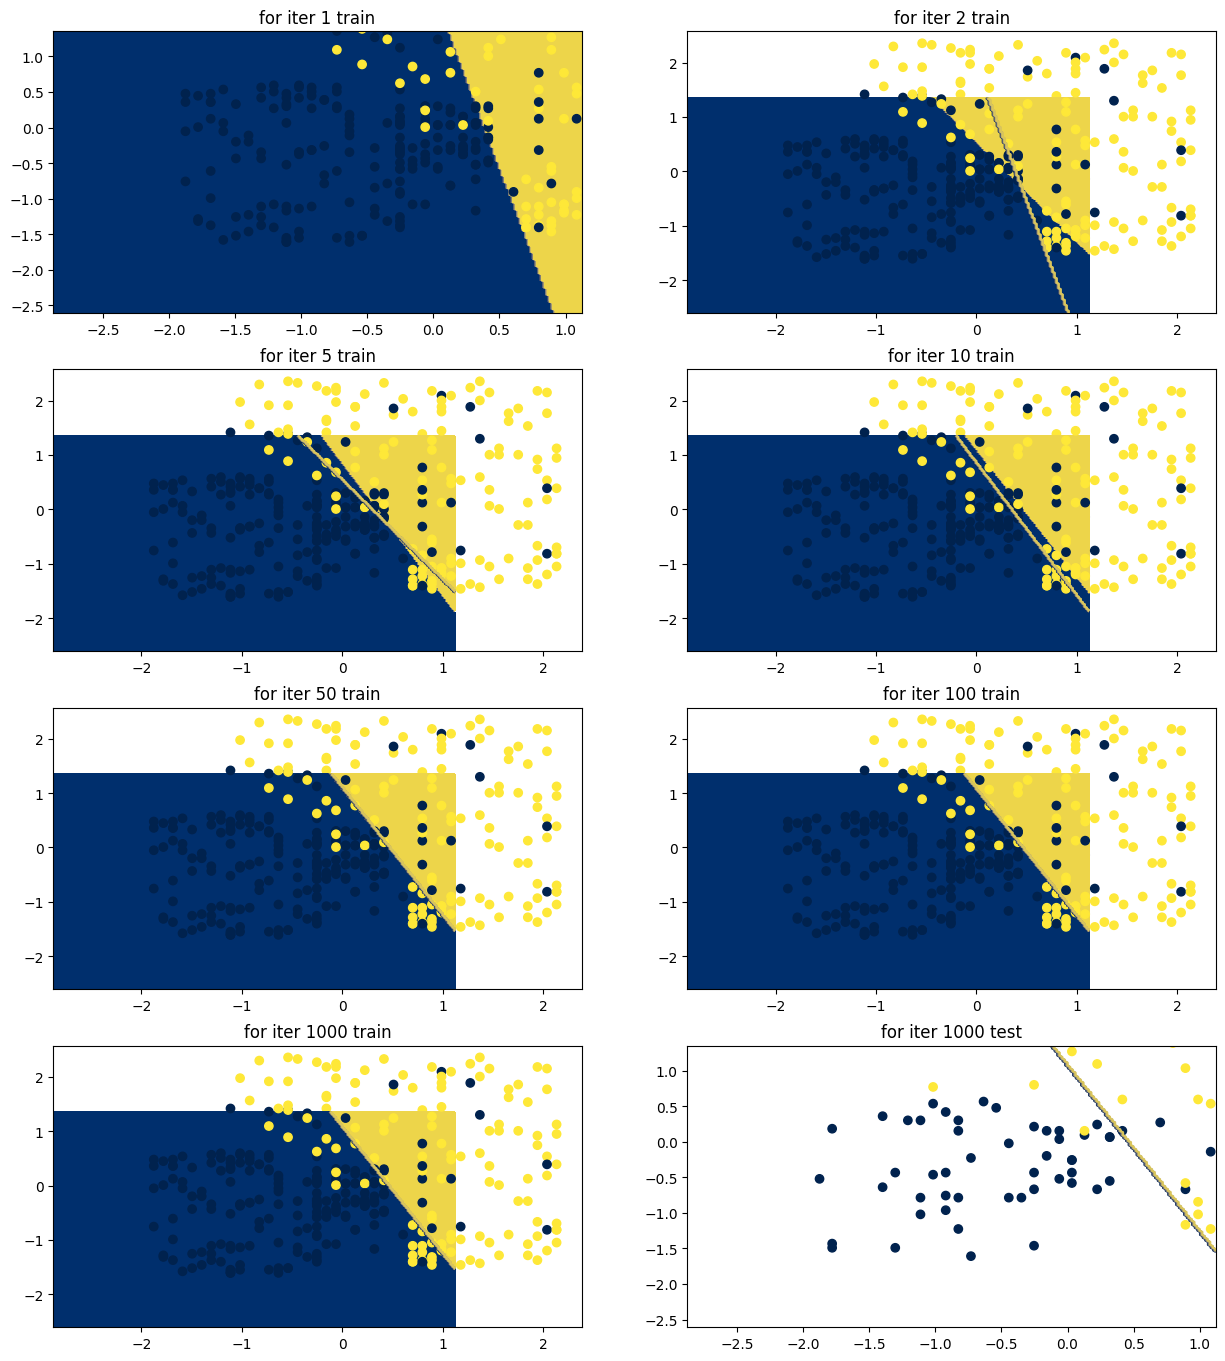

In [187]:
#min max values
age_min, age_max = x[:,1].min()-1, x[:,1].max()-1
es_min, es_max = x[:,2].min()-1, x[:,2 ].max()-1

# grid
age_grid, es_grid = np.meshgrid(np.arange(age_min, age_max,0.02),np.arange(es_min, es_max , 0.02))

# figure size
pl.figure(figsize=(15,30))

# color map
pl.set_cmap(pl.cm.cividis)

i=1

for it in [1,2,5,10,50,100,1000]:
    clf = LogisticRegression(max_iter=it, solver='sag')
    clf.fit(x_train[:,1:],y_train)
    train_preds = clf.predict(x_train[:,1:])
    test_preds = clf.predict(x_test[:,1:])
    print('iter', it)
    print('train acc', accuracy_score(y_train, train_preds))
    print('test acc', accuracy_score(y_test, test_preds))

    pl.subplot(7,2,i)
    z = clf.predict(np.c_[age_grid.ravel(),es_grid.ravel()])

    z = z.reshape(age_grid.shape)
    # pl.contour(age_grid, es_grid, z)
    pl.contourf(age_grid, es_grid, z)
    pl.axis('tight')

    pl.scatter(x_train[:,1],x_train[:,2],c=y_train)
    pl.title(f'for iter {it} train')

    i+=1
    pl.subplot(7,2,i)

    pl.contour(age_grid, es_grid, z)
    pl.axis('tight')

    pl.scatter(x_test[:,1],x_test[:,2],c=y_test)
    pl.title(f'for iter {it} test')
pl.show()